We are comparing the stock price of last 5 years by clustering the dataset using GMM.

I have picked the dataset from Kaggle. Link - https://www.kaggle.com/camnugent/sandp500

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import io

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Read and display the data

In [ ]:
stocks_data=pd.read_csv('/content/gdrive/My Drive/all_stocks_5yr.csv')
companies_list = stocks_data.groupby(['Name']).sum()
companies_list
stocks_data

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


Reorder the columns

In [ ]:

data = stocks_data
data = data[["Name", "date", "open", "low", "high", "close", "volume"]] 
data = data[(data["open"] != 0) | (data["close"] != 0) | (data["volume"] != 0)]
data

,Name,date,open,low,high,close,volume
0,AAL,2013-02-08,15.07,14.63,15.12,14.75,8407500
1,AAL,2013-02-11,14.89,14.26,15.01,14.46,8882000
2,AAL,2013-02-12,14.45,14.10,14.51,14.27,8126000
3,AAL,2013-02-13,14.30,14.25,14.94,14.66,10259500
4,AAL,2013-02-14,14.94,13.16,14.96,13.99,31879900
...,...,...,...,...,...,...,...
619035,ZTS,2018-02-01,76.84,76.69,78.27,77.82,2982259
619036,ZTS,2018-02-02,77.53,76.73,78.12,76.78,2595187
619037,ZTS,2018-02-05,76.64,73.18,76.92,73.83,2962031
619038,ZTS,2018-02-06,72.74,72.13,74.56,73.27,4924323


Display the dataset information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    619040 non-null  object 
 1   date    619040 non-null  object 
 2   open    619029 non-null  float64
 3   low     619032 non-null  float64
 4   high    619032 non-null  float64
 5   close   619040 non-null  float64
 6   volume  619040 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


Daily movement of each stocks

In [ ]:
open_price = data["open"]
close_price = data["close"]
daily_movement = ((close_price - open_price)/open_price)*100
daily_movement
data["movement"] = daily_movement
data
data = data.groupby(["Name"]).mean() 
data

,open,low,high,close,volume,movement
Name,,,,,,
A,49.187863,48.782026,49.600059,49.202025,2.338039e+06,0.042063
AAL,38.390495,37.825605,38.955554,38.393252,9.390321e+06,0.031150
AAP,132.439631,131.036025,133.818297,132.433463,1.078043e+06,0.003594
AAPL,109.055429,108.141589,109.951118,109.066698,5.404790e+07,0.013851
ABBV,60.802801,60.177275,61.474133,60.864440,7.870683e+06,0.101628
...,...,...,...,...,...,...
XYL,41.415473,41.076026,41.763885,41.434095,1.183141e+06,0.049200
YUM,75.422099,74.844914,76.027123,75.451009,3.209032e+06,0.044405
ZBH,105.542014,104.698038,106.419854,105.606291,1.297144e+06,0.069291


In [ ]:
data.reset_index(level=0, drop =2)
data.reset_index()

,Name,open,low,high,close,volume,movement
0,A,49.187863,48.782026,49.600059,49.202025,2.338039e+06,0.042063
1,AAL,38.390495,37.825605,38.955554,38.393252,9.390321e+06,0.031150
2,AAP,132.439631,131.036025,133.818297,132.433463,1.078043e+06,0.003594
3,AAPL,109.055429,108.141589,109.951118,109.066698,5.404790e+07,0.013851
4,ABBV,60.802801,60.177275,61.474133,60.864440,7.870683e+06,0.101628
...,...,...,...,...,...,...,...
500,XYL,41.415473,41.076026,41.763885,41.434095,1.183141e+06,0.049200
501,YUM,75.422099,74.844914,76.027123,75.451009,3.209032e+06,0.044405
502,ZBH,105.542014,104.698038,106.419854,105.606291,1.297144e+06,0.069291
503,ZION,32.161477,31.802241,32.509290,32.171790,2.621178e+06,0.045576


Plotting the data before the clustering

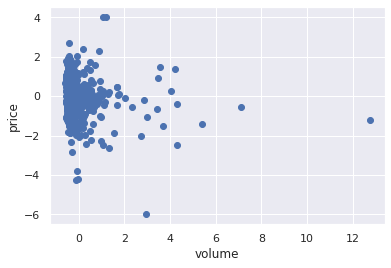

In [ ]:
sample_data = data.iloc[:, [4,5]].values
sample_data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sample_data = scaler.fit_transform(sample_data);
plt.scatter(sample_data[:,0], sample_data[:,1],cmap='viridis')
plt.xlabel('volume')
plt.ylabel('price')
plt.show()

Using the AIC and BIC function to get the optimal number of components to form a cluster

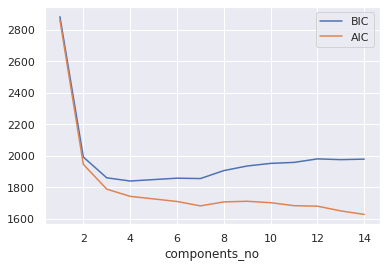

In [ ]:
from sklearn.mixture import GaussianMixture
components_no = np.arange(1, 15)
gmm = [GaussianMixture(n, covariance_type='full', random_state=0).fit(sample_data)
for n in n_components]
plt.plot(components_no, [m.bic(sample_data) for m in gmm], label='BIC')
plt.plot(components_no, [m.aic(sample_data) for m in gmm], label='AIC')
plt.legend(loc='best')
plt.xlabel('components_no');

Applying gmm algorithm 

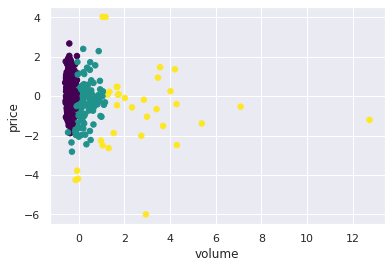

In [ ]:
gmm = GaussianMixture(n_components=3).fit(sample_data)
labels = gmm.predict(sample_data)
plt.scatter(sample_data[:,0], sample_data[:,1], c=labels, s=30, cmap='viridis');
plt.xlabel('volume')
plt.ylabel('price')
plt.show()

find probabilistic cluster assignments

In [ ]:
probs = gmm.predict_proba(sample_data)
print(probs[:5].round(3))

[[0.949 0.05  0.001]
 [0.    0.961 0.039]
 [0.889 0.107 0.004]
 [0.    0.    1.   ]
 [0.    0.918 0.082]]


Visualizing uncertainity of the cluster assignment

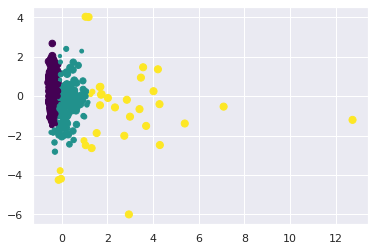

In [ ]:
size = 50*probs.max(1)**2
plt.scatter(testsample_data_data[:,0], sample_data[:,1], c=labels, s=size, cmap='viridis');


Function to visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    plt.figure(figsize = (10,8))
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

Clustering with 3 components

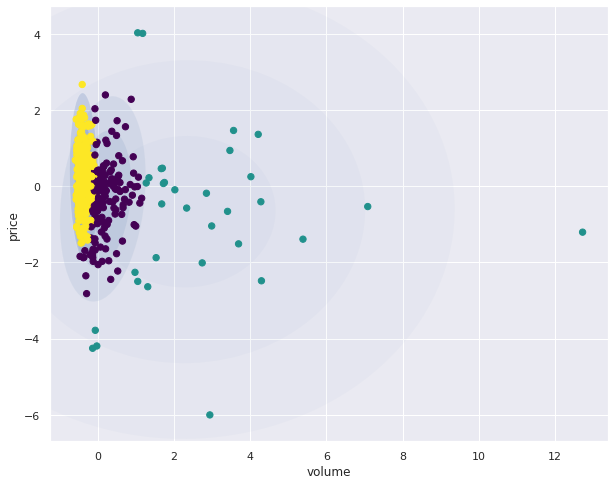

In [ ]:
gmm = GaussianMixture(n_components=3)
plot_gmm(gmm,sample_data)
plt.xlabel('volume')
plt.ylabel('price')
plt.show()

When comparing K-Means Algorithm with Gaussian Mixture Model Algorithm, I observed Gmm has better mechanism to perform clustering.

K-Means uses Hard Assignment, where it sets the centroid and apply clustering on the data points near the centroid based on the mean. Whereas, Gmm uses Soft Assignment where it uses probability to assign the data point to a cluster.

K-Means uses Elbow method to get the optimized number of clusters which might not be as optimal as we can get in Gmm using AIC and BIC functions.

Gmm provides better clustering as it can work with any type of data and does not consider the geographical shape of the data. Whereas K-Means assumes the data as spherical/circular which might limit the scope of clustering.